## **Lifestyle Habits and Weight Loss: A Personal Data Tracking Study**

I plan to track my daily lifestyle habits specifically calorie intake, physical activity (steps), sleep duration, and water intake—over the course of the term to understand their impact on my weekly weight change. As someone who is currently overweight (98 kg at 181 cm height), my goal is to lose weight and bring my BMI back to a normal range. This project will help me identify which habits most strongly influence my weight loss progress and what patterns distinguish successful weeks from unsuccessful ones. By analyzing my personal data, I hope to gain actionable insights that can guide my health decisions moving forward.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [57]:
df = pd.read_csv('DATA COLLECTION.csv')

print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()

Dataset shape: 78 rows × 7 columns

First 5 rows:


,Date,Steps,Calories,Water,Sleep (hrs),Weight (Kg),Weekly weight change (Kg)
0,11/19/2025,3406,1272,8,7.0,98.0,NaN
1,11/20/2025,593,1434,6,8.0,NaN,NaN
2,11/21/2025,5601,1756,7,7.0,NaN,NaN
3,11/22/2025,7060,1068,8,6.0,NaN,NaN
4,11/23/2025,4910,2165,7,8.0,NaN,NaN


In [58]:
print("Dataset Information:")
print(df.info())
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       78 non-null     object 
 1   Steps                      78 non-null     int64  
 2   Calories                   78 non-null     int64  
 3   Water                      78 non-null     int64  
 4   Sleep (hrs)                78 non-null     float64
 5   Weight (Kg)                12 non-null     float64
 6   Weekly weight change (Kg)  11 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.4+ KB
None

Missing Values:
Date                          0
Steps                         0
Calories                      0
Water                         0
Sleep (hrs)                   0
Weight (Kg)                  66
Weekly weight change (Kg)    67
dtype: int64


In [59]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Steps,Calories,Water,Sleep (hrs),Weight (Kg),Weekly weight change (Kg)
count,78.000000,78.000000,78.000000,78.000000,12.000000,11.000000
mean,6080.589744,1642.012821,6.512821,6.878205,97.066667,-0.109091
std,3659.342583,433.208881,1.316662,1.142979,0.526279,0.752934
min,593.000000,710.000000,4.000000,3.000000,96.100000,-1.600000
25%,2812.000000,1381.250000,6.000000,6.000000,96.775000,-0.450000
50%,5831.000000,1675.000000,6.500000,7.000000,97.000000,-0.100000
75%,8621.750000,1906.500000,7.750000,8.000000,97.425000,0.350000
max,14929.000000,3028.000000,10.000000,9.000000,98.000000,1.000000


In [60]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
print("✓ Date converted to datetime format")
df.head()

✓ Date converted to datetime format


,Date,Steps,Calories,Water,Sleep (hrs),Weight (Kg),Weekly weight change (Kg)
0,2025-11-19,3406,1272,8,7.0,98.0,NaN
1,2025-11-20,593,1434,6,8.0,NaN,NaN
2,2025-11-21,5601,1756,7,7.0,NaN,NaN
3,2025-11-22,7060,1068,8,6.0,NaN,NaN
4,2025-11-23,4910,2165,7,8.0,NaN,NaN


In [61]:
print("Original Columns:", df.columns.tolist())
df.columns = df.columns.str.strip()
print("Cleaned Columns:", df.columns.tolist())

# Create binary column for calorie target
df['Met_Calorie_Target'] = df['Calories'] <= 1800

# Create binary column for step target
df['Met_Step_Target'] = df['Steps'] >= 10000

print("✓ Target columns created!")
print(f"\nDays meeting calorie target (≤1800): {df['Met_Calorie_Target'].sum()}")
print(f"Days NOT meeting calorie target: {(~df['Met_Calorie_Target']).sum()}")
print(f"\nDays meeting step target (≥10000): {df['Met_Step_Target'].sum()}")
print(f"Days NOT meeting step target: {(~df['Met_Step_Target']).sum()}")

Original Columns: ['Date', 'Steps', 'Calories', 'Water', 'Sleep (hrs)', 'Weight (Kg)', 'Weekly weight change (Kg)']
Cleaned Columns: ['Date', 'Steps', 'Calories', 'Water', 'Sleep (hrs)', 'Weight (Kg)', 'Weekly weight change (Kg)']
✓ Target columns created!

Days meeting calorie target (≤1800): 52
Days NOT meeting calorie target: 26

Days meeting step target (≥10000): 15
Days NOT meeting step target: 63


In [62]:
df[['Date', 'Steps', 'Calories', 'Water', 'Sleep (hrs)',
    'Met_Calorie_Target', 'Met_Step_Target', 'Weekly weight change (Kg)']].head(10)

,Date,Steps,Calories,Water,Sleep (hrs),Met_Calorie_Target,Met_Step_Target,Weekly weight change (Kg)
0,2025-11-19,3406,1272,8,7.0,True,False,NaN
1,2025-11-20,593,1434,6,8.0,True,False,NaN
2,2025-11-21,5601,1756,7,7.0,True,False,NaN
3,2025-11-22,7060,1068,8,6.0,True,False,NaN
4,2025-11-23,4910,2165,7,8.0,False,False,NaN
5,2025-11-24,675,865,6,8.0,True,False,NaN
6,2025-11-25,6287,2037,8,6.0,False,False,NaN
7,2025-11-26,3599,2168,6,8.0,False,False,-0.5
8,2025-11-27,11526,1098,9,7.5,True,True,NaN
9,2025-11-28,7053,1686,7,7.0,True,False,NaN


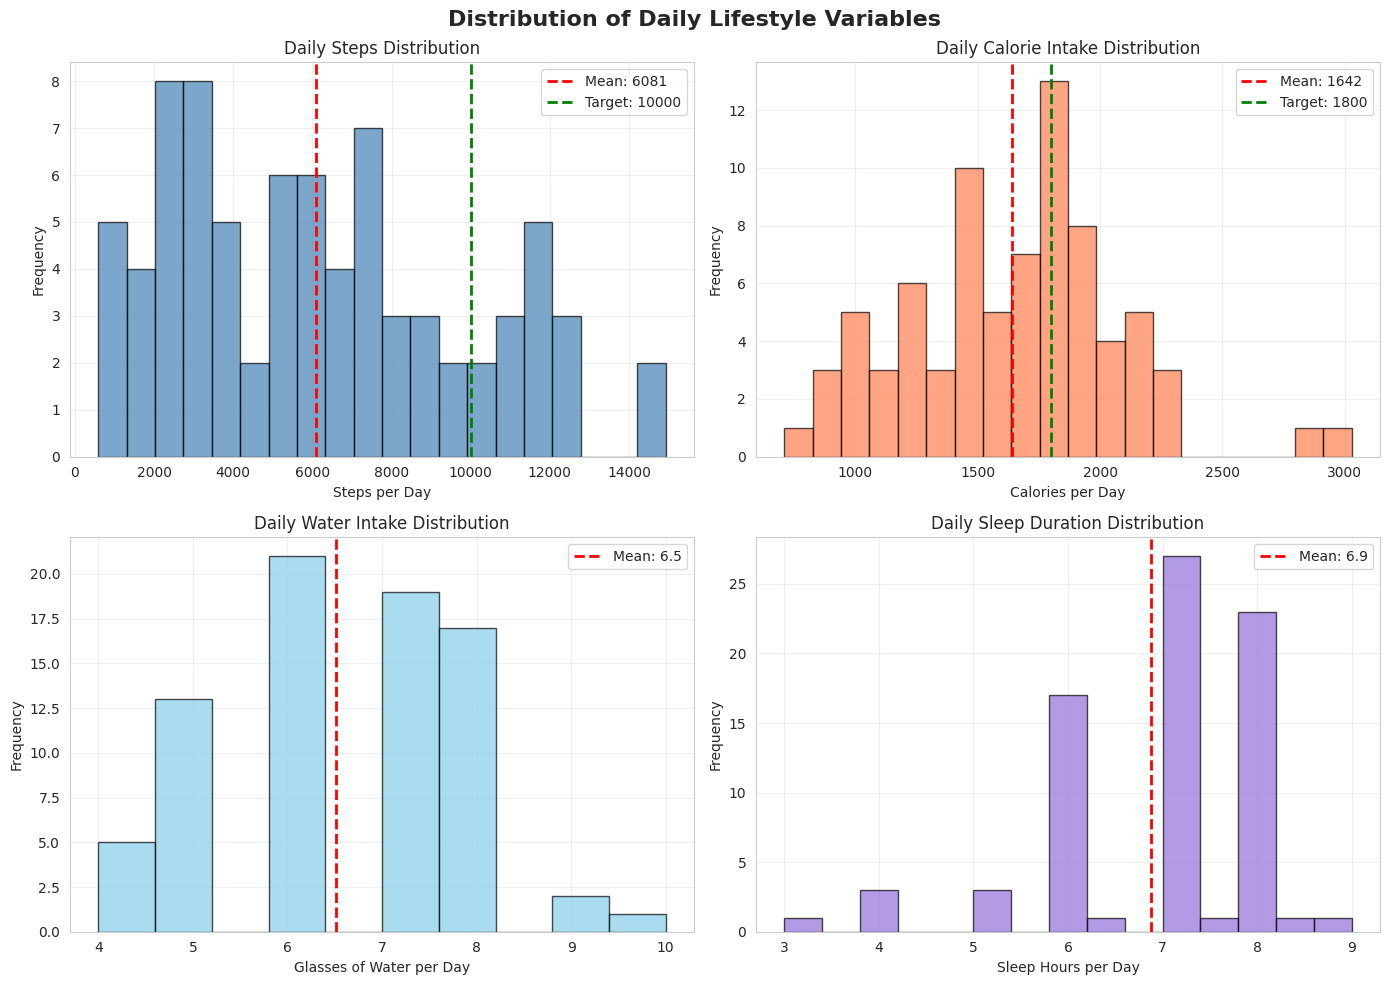

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Daily Lifestyle Variables', fontsize=16, fontweight='bold')

# Steps
axes[0, 0].hist(df['Steps'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Steps'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Steps"].mean():.0f}')
axes[0, 0].axvline(10000, color='green', linestyle='--', linewidth=2, label='Target: 10000')
axes[0, 0].set_xlabel('Steps per Day')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Daily Steps Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df['Calories'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['Calories'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Calories"].mean():.0f}')
axes[0, 1].axvline(1800, color='green', linestyle='--', linewidth=2, label='Target: 1800')
axes[0, 1].set_xlabel('Calories per Day')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Daily Calorie Intake Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Water
axes[1, 0].hist(df['Water'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['Water'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Water"].mean():.1f}')
axes[1, 0].set_xlabel('Glasses of Water per Day')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Daily Water Intake Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Sleep
axes[1, 1].hist(df['Sleep (hrs)'], bins=15, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['Sleep (hrs)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Sleep (hrs)"].mean():.1f}')
axes[1, 1].set_xlabel('Sleep Hours per Day')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Daily Sleep Duration Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figure1_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


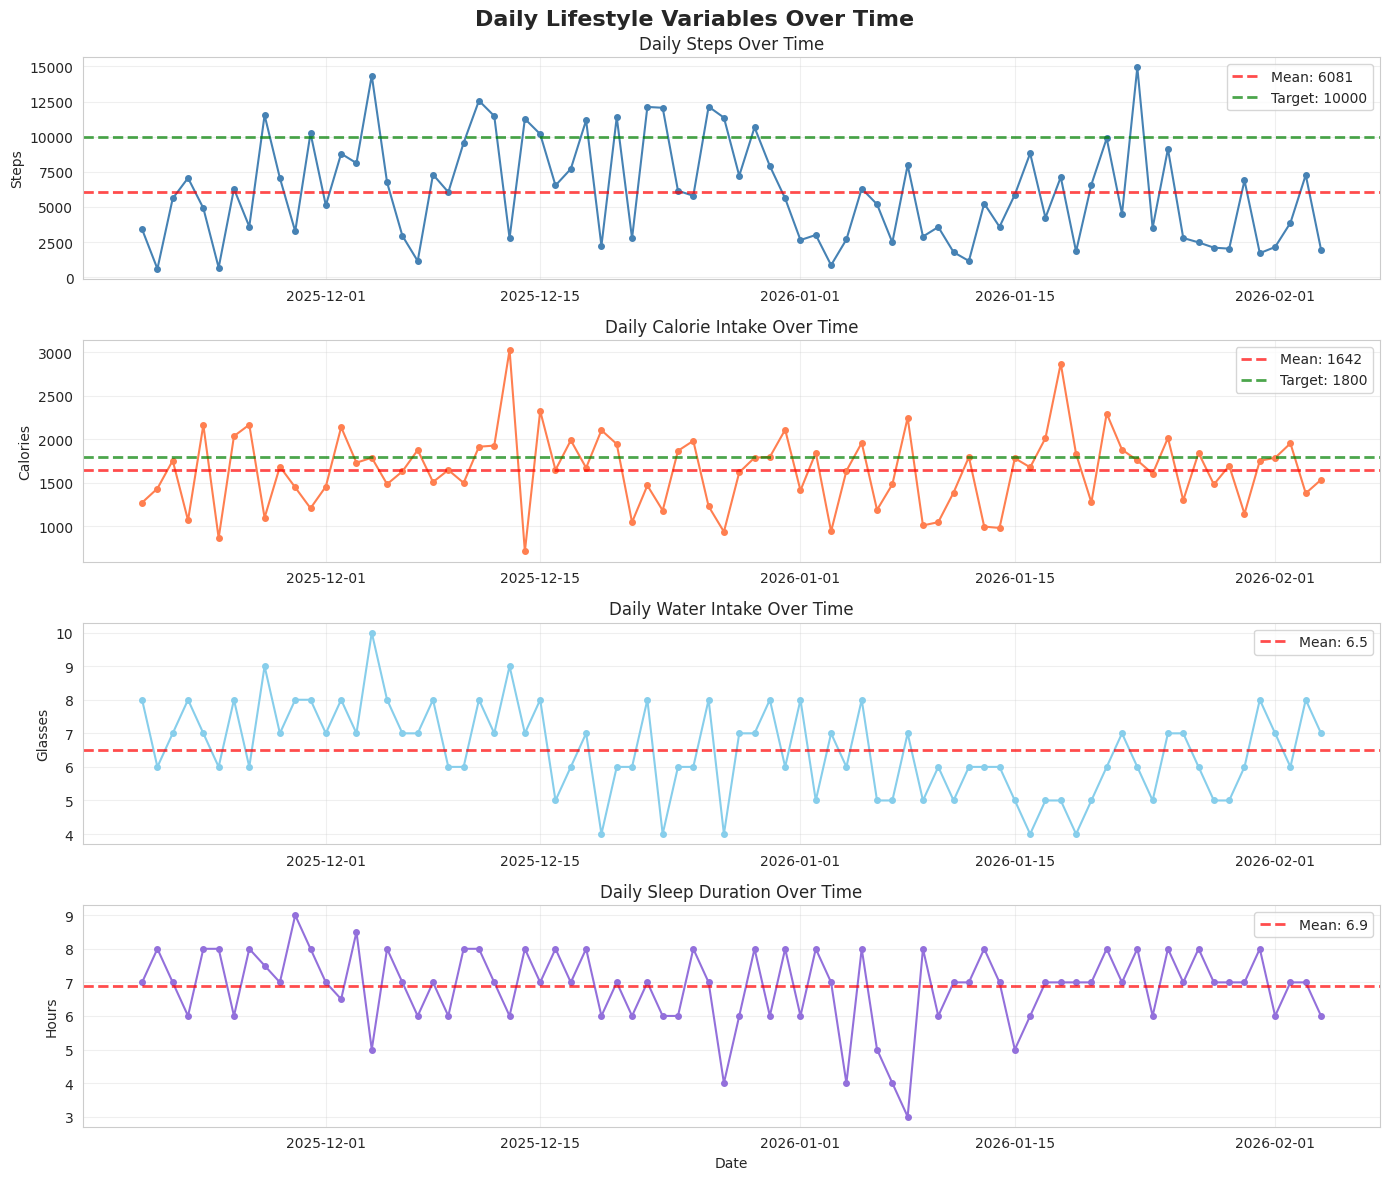

In [64]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12))
fig.suptitle('Daily Lifestyle Variables Over Time', fontsize=16, fontweight='bold')

# Steps over time
axes[0].plot(df['Date'], df['Steps'], marker='o', linewidth=1.5, markersize=4, color='steelblue')
axes[0].axhline(df['Steps'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Mean: {df["Steps"].mean():.0f}')
axes[0].axhline(10000, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Target: 10000')
axes[0].set_ylabel('Steps')
axes[0].set_title('Daily Steps Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Calories over time
axes[1].plot(df['Date'], df['Calories'], marker='o', linewidth=1.5, markersize=4, color='coral')
axes[1].axhline(df['Calories'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Mean: {df["Calories"].mean():.0f}')
axes[1].axhline(1800, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Target: 1800')
axes[1].set_ylabel('Calories')
axes[1].set_title('Daily Calorie Intake Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Water over time
axes[2].plot(df['Date'], df['Water'], marker='o', linewidth=1.5, markersize=4, color='skyblue')
axes[2].axhline(df['Water'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Mean: {df["Water"].mean():.1f}')
axes[2].set_ylabel('Glasses')
axes[2].set_title('Daily Water Intake Over Time')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Sleep over time
axes[3].plot(df['Date'], df['Sleep (hrs)'], marker='o', linewidth=1.5, markersize=4, color='mediumpurple')
axes[3].axhline(df['Sleep (hrs)'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Mean: {df["Sleep (hrs)"].mean():.1f}')
axes[3].set_ylabel('Hours')
axes[3].set_xlabel('Date')
axes[3].set_title('Daily Sleep Duration Over Time')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figure2_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

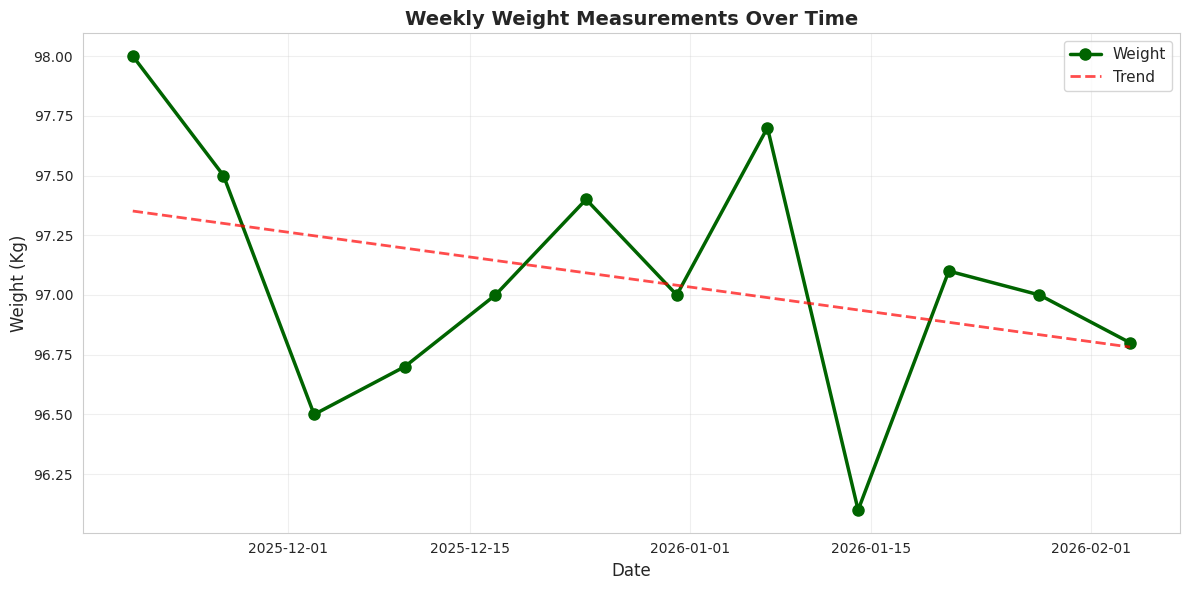

Starting weight: 98.00 kg
Final weight: 96.80 kg
Total weight change: -1.20 kg


In [65]:
# Filter rows with weight measurements
weight_df = df[df['Weight (Kg)'].notna()].copy()

plt.figure(figsize=(12, 6))
plt.plot(weight_df['Date'], weight_df['Weight (Kg)'], marker='o', linewidth=2.5, markersize=8, color='darkgreen', label='Weight')

# Add trend line
z = np.polyfit(range(len(weight_df)), weight_df['Weight (Kg)'], 1)
p = np.poly1d(z)
plt.plot(weight_df['Date'], p(range(len(weight_df))), linestyle='--', linewidth=2, color='red', alpha=0.7, label='Trend')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Weight (Kg)', fontsize=12)
plt.title('Weekly Weight Measurements Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figure3_weight_progression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Starting weight: {weight_df['Weight (Kg)'].iloc[0]:.2f} kg")
print(f"Final weight: {weight_df['Weight (Kg)'].iloc[-1]:.2f} kg")
print(f"Total weight change: {weight_df['Weight (Kg)'].iloc[-1] - weight_df['Weight (Kg)'].iloc[0]:.2f} kg")


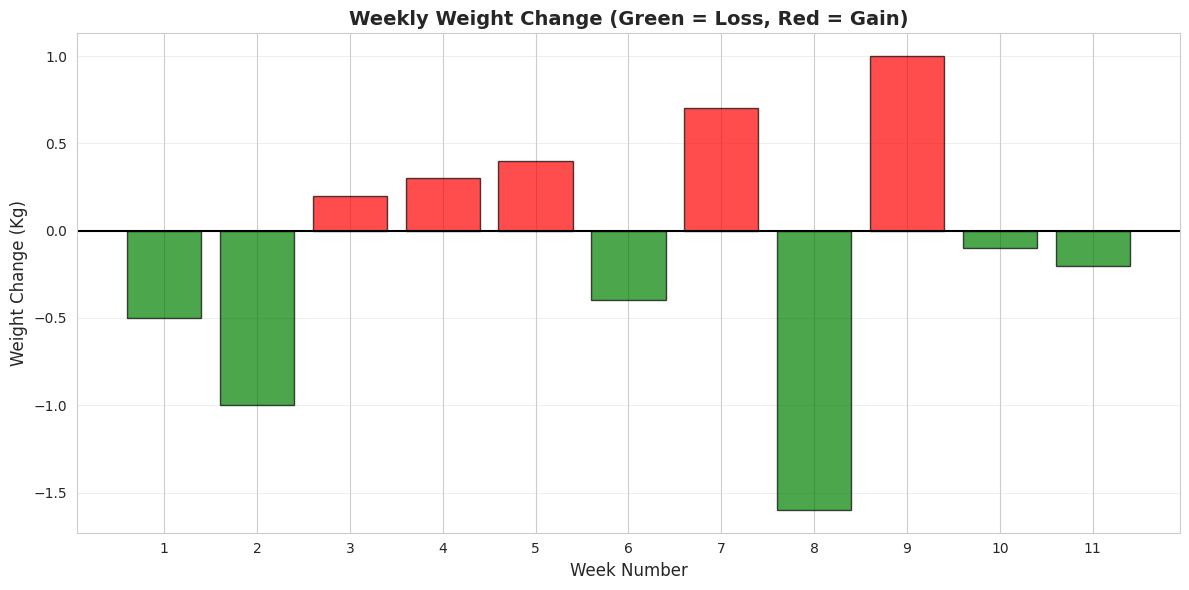

In [66]:
weight_change_df = df[df['Weekly weight change (Kg)'].notna()].copy()

plt.figure(figsize=(12, 6))
colors = ['green' if x < 0 else 'red' if x > 0 else 'gray' for x in weight_change_df['Weekly weight change (Kg)']]
plt.bar(range(1, len(weight_change_df) + 1), weight_change_df['Weekly weight change (Kg)'],
        color=colors, edgecolor='black', alpha=0.7)
plt.axhline(0, color='black', linewidth=1.5)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Weight Change (Kg)', fontsize=12)
plt.title('Weekly Weight Change (Green = Loss, Red = Gain)', fontsize=14, fontweight='bold')
plt.xticks(range(1, len(weight_change_df) + 1))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('figure4_weekly_change.png', dpi=300, bbox_inches='tight')
plt.show()


In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = ((df['Date'] - df['Date'].min()).dt.days // 7) + 1
print("✓ Week number created")
df[['Date', 'Week', 'Steps', 'Calories']].head(14)

✓ Week number created


,Date,Week,Steps,Calories
0,2025-11-19,1,3406,1272
1,2025-11-20,1,593,1434
2,2025-11-21,1,5601,1756
3,2025-11-22,1,7060,1068
4,2025-11-23,1,4910,2165
5,2025-11-24,1,675,865
6,2025-11-25,1,6287,2037
7,2025-11-26,2,3599,2168
8,2025-11-27,2,11526,1098
9,2025-11-28,2,7053,1686


In [68]:
# Calculate weekly averages
weekly_data = df.groupby('Week').agg({
    'Steps': 'mean',
    'Calories': 'mean',
    'Water': 'mean',
    'Sleep (hrs)': 'mean',
    'Met_Calorie_Target': 'mean',  # Proportion of days meeting target
    'Met_Step_Target': 'mean'       # Proportion of days meeting target
}).round(2)

# Add weekly weight change
weight_change_by_week = df[df['Weekly weight change (Kg)'].notna()].groupby('Week')['Weekly weight change (Kg)'].first()
weekly_data = weekly_data.join(weight_change_by_week)

# Remove weeks without weight change data
weekly_data = weekly_data[weekly_data['Weekly weight change (Kg)'].notna()]

print("Weekly Aggregated Data:")
weekly_data

Weekly Aggregated Data:


,Steps,Calories,Water,Sleep (hrs),Met_Calorie_Target,Met_Step_Target,Weekly weight change (Kg)
Week,,,,,,,
2,7082.71,1600.43,7.57,7.57,0.71,0.29,-0.5
3,6664.57,1666.86,7.57,6.79,0.86,0.14,-1.0
4,9191.29,1865.00,7.14,7.43,0.43,0.57,0.2
5,8488.14,1629.71,5.86,6.71,0.57,0.57,0.3
6,8745.86,1603.00,6.57,6.43,0.71,0.43,0.4
7,3752.71,1585.14,6.43,6.57,0.57,0.00,-0.4
8,3582.14,1424.00,5.71,6.14,0.86,0.00,0.7
9,5433.86,1776.14,4.86,6.57,0.57,0.00,-1.6
10,6743.86,1814.14,6.29,7.43,0.43,0.14,1.0


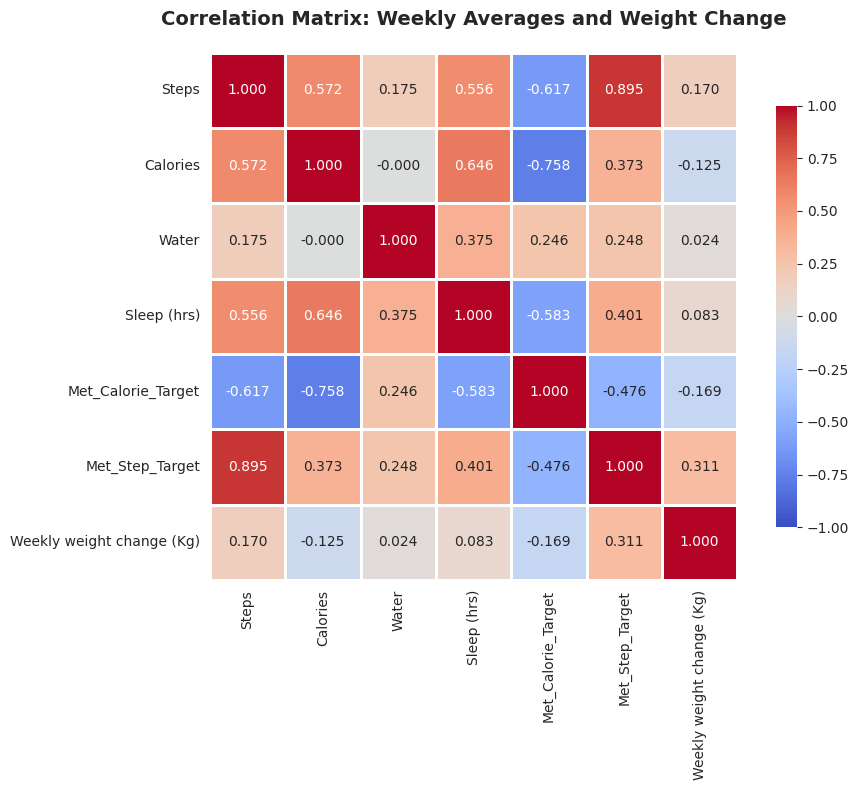


Correlations with Weekly Weight Change:
Weekly weight change (Kg)    1.000000
Met_Step_Target              0.311267
Steps                        0.169735
Sleep (hrs)                  0.082690
Water                        0.023856
Calories                    -0.125439
Met_Calorie_Target          -0.169064
Name: Weekly weight change (Kg), dtype: float64


In [69]:
# Calculate correlation matrix
corr_matrix = weekly_data.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Weekly Averages and Weight Change',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('figure5_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Show correlations with weight change
print("\nCorrelations with Weekly Weight Change:")
print("="*50)
correlation_with_weight = weekly_data.corr()['Weekly weight change (Kg)'].sort_values(ascending=False)
print(correlation_with_weight)

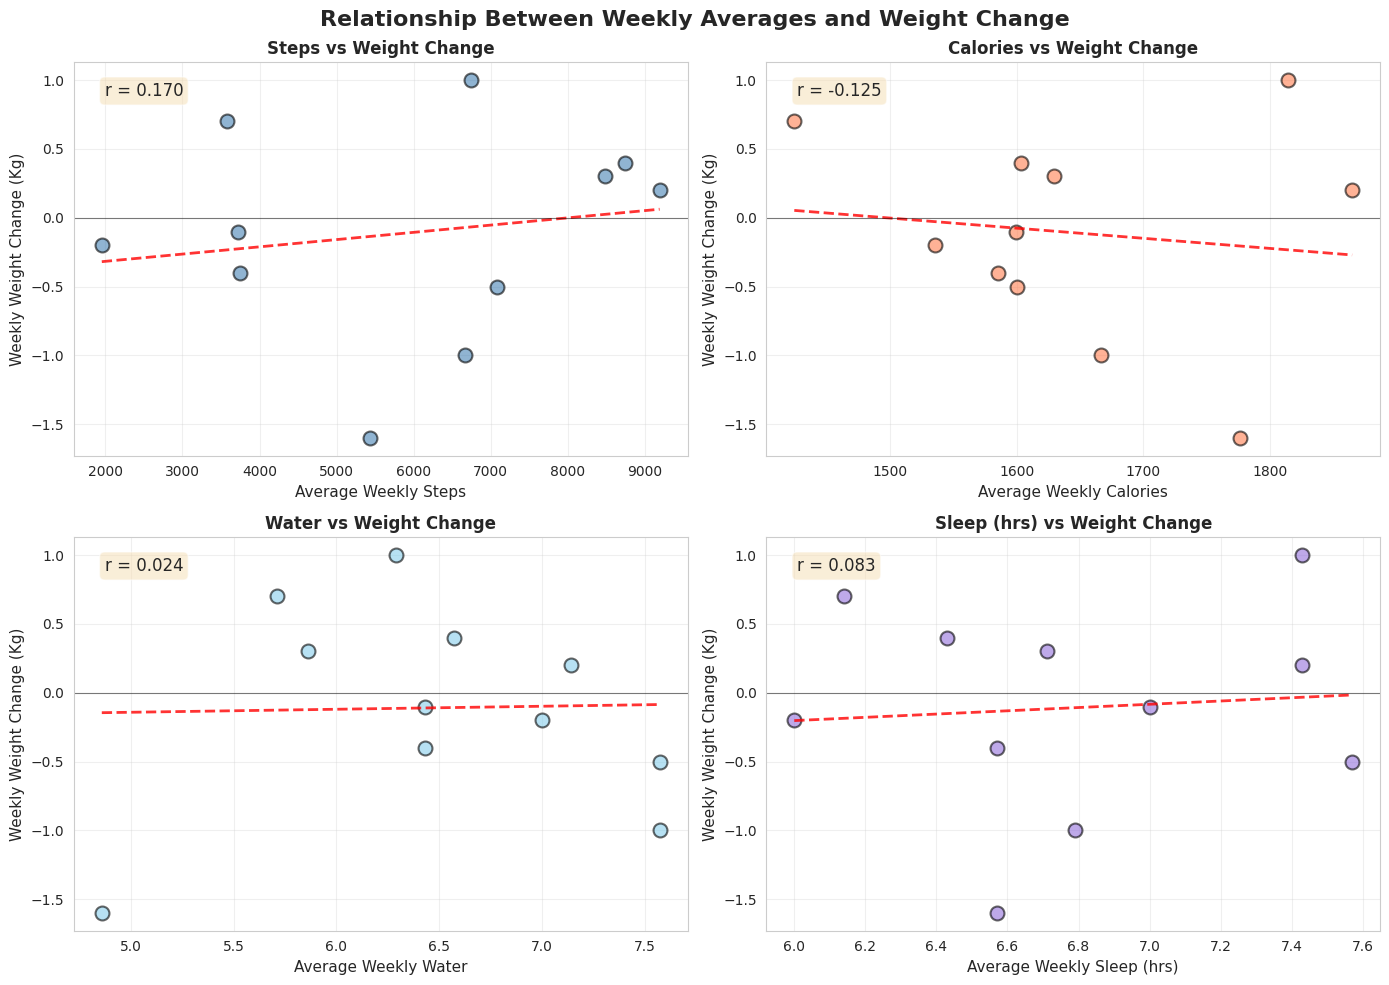

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relationship Between Weekly Averages and Weight Change', fontsize=16, fontweight='bold')

variables = ['Steps', 'Calories', 'Water', 'Sleep (hrs)']
colors_scatter = ['steelblue', 'coral', 'skyblue', 'mediumpurple']

for idx, (var, color) in enumerate(zip(variables, colors_scatter)):
    row = idx // 2
    col = idx % 2

    # Scatter plot
    axes[row, col].scatter(weekly_data[var], weekly_data['Weekly weight change (Kg)'],
                          s=100, alpha=0.6, color=color, edgecolors='black', linewidth=1.5)

    # Add trend line
    z = np.polyfit(weekly_data[var], weekly_data['Weekly weight change (Kg)'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(weekly_data[var].min(), weekly_data[var].max(), 100)
    axes[row, col].plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)

    # Add correlation
    corr = weekly_data[var].corr(weekly_data['Weekly weight change (Kg)'])
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}',
                       transform=axes[row, col].transAxes,
                       fontsize=12, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    axes[row, col].set_xlabel(f'Average Weekly {var}', fontsize=11)
    axes[row, col].set_ylabel('Weekly Weight Change (Kg)', fontsize=11)
    axes[row, col].set_title(f'{var} vs Weight Change', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].axhline(0, color='black', linewidth=0.8, linestyle='-', alpha=0.5)

plt.tight_layout()
plt.savefig('figure6_scatter_relationships.png', dpi=300, bbox_inches='tight')
plt.show()


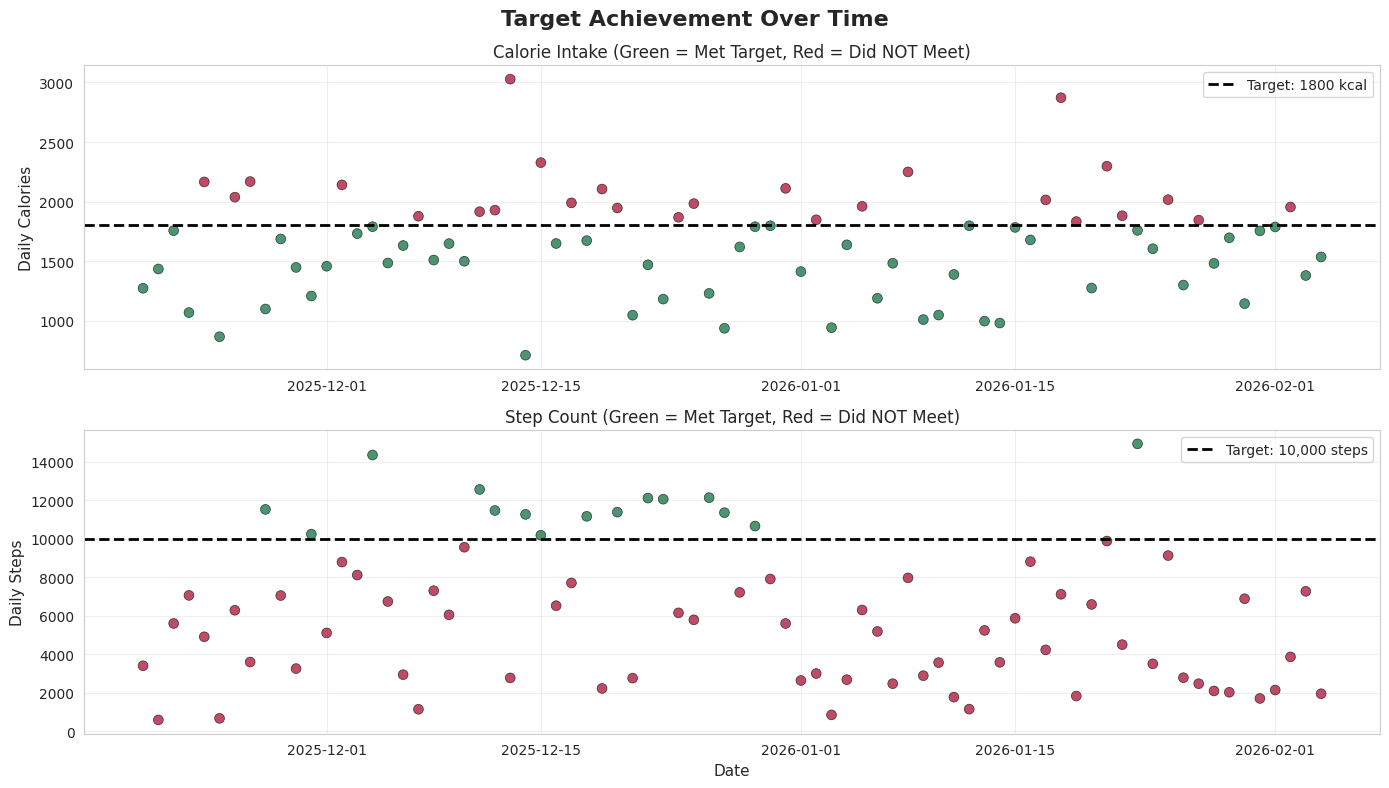

In [71]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Target Achievement Over Time', fontsize=16, fontweight='bold')

# Calorie target over time
axes[0].scatter(df['Date'], df['Calories'], c=df['Met_Calorie_Target'],
               cmap='RdYlGn', s=50, edgecolors='black', linewidth=0.5, alpha=0.7)
axes[0].axhline(1800, color='black', linestyle='--', linewidth=2, label='Target: 1800 kcal')
axes[0].set_ylabel('Daily Calories', fontsize=11)
axes[0].set_title('Calorie Intake (Green = Met Target, Red = Did NOT Meet)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Step target over time
axes[1].scatter(df['Date'], df['Steps'], c=df['Met_Step_Target'],
               cmap='RdYlGn', s=50, edgecolors='black', linewidth=0.5, alpha=0.7)
axes[1].axhline(10000, color='black', linestyle='--', linewidth=2, label='Target: 10,000 steps')
axes[1].set_ylabel('Daily Steps', fontsize=11)
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_title('Step Count (Green = Met Target, Red = Did NOT Meet)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figure7_target_achievement.png', dpi=300, bbox_inches='tight')
plt.show()


# **# Hypothesis 1**
* **Alternative Hypothesis**: H₀₁: My target calorie intake (1800kcal)has no significant effect on weekly weight change.
* **Alternative Hypothesis**:
H₁₁: My target calorie intake (1800kcal) is significantly associated with greater weekly weight loss.

In [72]:
print("="*70)
print("HYPOTHESIS 1: CALORIE INTAKE AND WEIGHT CHANGE")
print("="*70)
print("\nH₀: My target calorie intake has NO significant effect on weekly weight change")
print("H₁: My target calorie intake IS significantly associated with greater weekly weight loss")
print("\nCalorie Target: ≤1800 kcal/day")
print("="*70)

# Split data into 2 groups based on calorie target
met_cal = df[df['Met_Calorie_Target'] == True]['Weekly weight change (Kg)'].dropna()
not_met_cal = df[df['Met_Calorie_Target'] == False]['Weekly weight change (Kg)'].dropna()

print(f"\nDays meeting calorie target (≤1800): {len(df[df['Met_Calorie_Target'] == True])}")
print(f"Days NOT meeting calorie target (>1800): {len(df[df['Met_Calorie_Target'] == False])}")
print(f"\nWeeks with weight data - Met target: {len(met_cal)}")
print(f"Weeks with weight data - Did NOT meet target: {len(not_met_cal)}")

HYPOTHESIS 1: CALORIE INTAKE AND WEIGHT CHANGE

H₀: My target calorie intake has NO significant effect on weekly weight change
H₁: My target calorie intake IS significantly associated with greater weekly weight loss

Calorie Target: ≤1800 kcal/day

Days meeting calorie target (≤1800): 52
Days NOT meeting calorie target (>1800): 26

Weeks with weight data - Met target: 6
Weeks with weight data - Did NOT meet target: 5


In [73]:
print("\nDESCRIPTIVE STATISTICS:")
print("="*70)
print("\nMet Calorie Target (≤1800 kcal):")
print(f"  Mean weight change: {met_cal.mean():.4f} kg")
print(f"  SD: {met_cal.std():.4f} kg")
print(f"  Min: {met_cal.min():.4f} kg")
print(f"  Max: {met_cal.max():.4f} kg")

print("\nDid NOT Meet Calorie Target (>1800 kcal):")
print(f"  Mean weight change: {not_met_cal.mean():.4f} kg")
print(f"  SD: {not_met_cal.std():.4f} kg")
print(f"  Min: {not_met_cal.min():.4f} kg")
print(f"  Max: {not_met_cal.max():.4f} kg")

print(f"\nDifference in means: {met_cal.mean() - not_met_cal.mean():.4f} kg")


DESCRIPTIVE STATISTICS:

Met Calorie Target (≤1800 kcal):
  Mean weight change: -0.3333 kg
  SD: 0.8335 kg
  Min: -1.6000 kg
  Max: 0.7000 kg

Did NOT Meet Calorie Target (>1800 kcal):
  Mean weight change: 0.1600 kg
  SD: 0.6189 kg
  Min: -0.5000 kg
  Max: 1.0000 kg

Difference in means: -0.4933 kg


In [74]:
# Perform independent t-test
t_stat_cal, p_value_cal = ttest_ind(met_cal, not_met_cal)

print("\nINDEPENDENT T-TEST RESULTS:")
print("="*70)
print(f"t-statistic: {t_stat_cal:.4f}")
print(f"p-value: {p_value_cal:.4f}")
print(f"Significance level: α = 0.05")
print("="*70)

# Interpretation
print("\nINTERPRETATION:")
if p_value_cal < 0.05:
    print("✓ REJECT H₀")
    print("Meeting calorie target IS significantly associated with weight loss (p < 0.05)")
else:
    print("✗ FAIL TO REJECT H₀")
    print("No significant difference found (p ≥ 0.05)")
    print("Meeting calorie target does NOT have a statistically significant effect on weight change")


INDEPENDENT T-TEST RESULTS:
t-statistic: -1.0925
p-value: 0.3030
Significance level: α = 0.05

INTERPRETATION:
✗ FAIL TO REJECT H₀
No significant difference found (p ≥ 0.05)
Meeting calorie target does NOT have a statistically significant effect on weight change


# **# Hypothesis 2**
* **Null Hypothesis**: H₀₂: Reaching my target step count (10000) has no significant relationship with weekly weight change.
* **Alternative Hypothesis**:
H₁₂: Reaching my target step count (10000) is significantly associated with greater weekly weight loss.

In [75]:
# ========================================
# HYPOTHESIS 2: PHYSICAL ACTIVITY (STEPS)
# ========================================

print("="*70)
print("HYPOTHESIS 2: STEP TARGET AND WEIGHT CHANGE")
print("="*70)

print("\nORIGINAL HYPOTHESIS:")
print("H₀: Meeting the 10,000 step target has no effect on weekly weight change")
print("H₁: Meeting the 10,000 step target leads to greater weekly weight loss")
print("\nStep Target: ≥10,000 steps/day")
print("="*70)

# ========================================
# PRIMARY ANALYSIS: 10,000 Step Target
# ========================================

# Calculate weekly target achievement
weekly_data['Met_Step_Target'] = df.groupby('Week')['Met_Step_Target'].mean()

# Split weeks: those that met target ≥50% of days vs those that didn't
met_steps = weekly_data[weekly_data['Met_Step_Target'] >= 0.5]['Weekly weight change (Kg)'].dropna()
not_met_steps = weekly_data[weekly_data['Met_Step_Target'] < 0.5]['Weekly weight change (Kg)'].dropna()

print(f"\nDaily Achievement:")
print(f"  Days meeting 10,000 steps: {df['Met_Step_Target'].sum()} out of {len(df)} ({(df['Met_Step_Target'].sum()/len(df)*100):.1f}%)")
print(f"  Days NOT meeting target: {(~df['Met_Step_Target']).sum()} out of {len(df)} ({((~df['Met_Step_Target']).sum()/len(df)*100):.1f}%)")

print(f"\nWeekly Comparison Groups:")
print(f"  Weeks meeting target (≥50% of days): {len(met_steps)} weeks")
print(f"  Weeks NOT meeting target (<50% of days): {len(not_met_steps)} weeks")

# Check if we can perform t-test
if len(met_steps) < 3 or len(not_met_steps) < 3:
    print("\n" + "="*70)
    print("⚠️ INSUFFICIENT SAMPLE SIZE FOR STATISTICAL TEST")
    print("="*70)
    print(f"\nOnly {len(met_steps)} weeks consistently met the 10,000 step target.")
    print("A minimum of 3 observations per group is needed for valid t-test.")
    print("\n❌ CONCLUSION: Original hypothesis CANNOT be tested as formulated")
    print("\nThis finding indicates:")
    print("  • The 10,000 step target was unrealistic for this individual")
    print("  • Only 19.2% daily achievement rate")
    print("  • Target selection should be based on personal baseline, not population norms")

    p_value_steps_original = None
    t_stat_steps_original = None

else:
    # If enough data, perform the test
    if len(met_steps) > 0 and len(not_met_steps) > 0:
        print("\nDescriptive Statistics:")
        print(f"  Weeks meeting target: Mean = {met_steps.mean():.4f} kg, SD = {met_steps.std():.4f} kg")
        print(f"  Weeks NOT meeting target: Mean = {not_met_steps.mean():.4f} kg, SD = {not_met_steps.std():.4f} kg")

        t_stat_steps_original, p_value_steps_original = ttest_ind(met_steps, not_met_steps, nan_policy='omit')

        print(f"\nIndependent t-test: t = {t_stat_steps_original:.4f}, p = {p_value_steps_original:.4f}")

        if p_value_steps_original < 0.05:
            print("✓ Result: SIGNIFICANT (p < 0.05)")
        else:
            print("✗ Result: NOT SIGNIFICANT (p ≥ 0.05)")

# ========================================
# ALTERNATIVE ANALYSIS: Median Split
# ========================================

print("\n" + "="*70)
print("ALTERNATIVE EXPLORATORY ANALYSIS")
print("="*70)
print("\nSince the original hypothesis could not be tested due to low target")
print("achievement, an exploratory analysis compares weeks with above-median")
print("vs below-median step counts to examine if relative activity level")
print("relates to weight change.")
print("="*70)

# Calculate median
median_steps = weekly_data['Steps'].median()
print(f"\nMedian weekly average steps: {median_steps:.0f} steps/day")

# Split by median
high_steps = weekly_data[weekly_data['Steps'] >= median_steps]['Weekly weight change (Kg)'].dropna()
low_steps = weekly_data[weekly_data['Steps'] < median_steps]['Weekly weight change (Kg)'].dropna()

print(f"\nHigh Activity Weeks (≥{median_steps:.0f} steps/day): {len(high_steps)} weeks")
print(f"  Mean weight change: {high_steps.mean():.4f} kg")
print(f"  SD: {high_steps.std():.4f} kg")

print(f"\nLow Activity Weeks (<{median_steps:.0f} steps/day): {len(low_steps)} weeks")
print(f"  Mean weight change: {low_steps.mean():.4f} kg")
print(f"  SD: {low_steps.std():.4f} kg")

print(f"\nDifference in means: {high_steps.mean() - low_steps.mean():.4f} kg")

# Perform t-test for alternative analysis
t_stat_alt, p_value_alt = ttest_ind(high_steps, low_steps, nan_policy='omit')

print(f"\nIndependent t-test: t = {t_stat_alt:.4f}, p = {p_value_alt:.4f}")
print(f"Significance level: α = 0.05")

if p_value_alt < 0.05:
    print("\n✓ Result: SIGNIFICANT (p < 0.05)")
    print("High-activity weeks show significantly different weight change")
    print("compared to low-activity weeks.")
else:
    print("\n✗ Result: NOT SIGNIFICANT (p ≥ 0.05)")
    print("No significant difference between high and low activity weeks.")

# ========================================
# FINAL CONCLUSION
# ========================================

print("\n" + "="*70)
print("OVERALL CONCLUSION FOR HYPOTHESIS 2")
print("="*70)

print("\n1. PRIMARY HYPOTHESIS (10,000 step target):")
if p_value_steps_original is None:
    print("   ❌ Could not be tested - insufficient target achievement")
    print("   → Target was unrealistic for this individual's lifestyle")
elif p_value_steps_original < 0.05:
    print(f"   ✓ Significant effect found (p = {p_value_steps_original:.4f})")
else:
    print(f"   ✗ No significant effect (p = {p_value_steps_original:.4f})")

print("\n2. ALTERNATIVE ANALYSIS (median split):")
if p_value_alt < 0.05:
    print(f"   ✓ Significant difference found (p = {p_value_alt:.4f})")
else:
    print(f"   ✗ No significant difference (p = {p_value_alt:.4f})")

print("\n3. CORRELATION ANALYSIS (from earlier):")
corr_steps = weekly_data['Steps'].corr(weekly_data['Weekly weight change (Kg)'])
print(f"   Steps vs Weight Change: r = {corr_steps:.4f} (very weak)")

print("\n" + "="*70)
print("SYNTHESIS:")
print("="*70)
print("Physical activity (measured by daily step count) did NOT show a")
print("statistically significant relationship with weekly weight change in")
print("this 11-week study, regardless of analytical approach.")
print("\nPossible explanations:")
print("  • Sample size too small (n=11 weeks)")
print("  • Week-to-week weight variability too high (water retention)")
print("  • Physical activity effects may be cumulative, not immediate")
print("  • Other factors (calories, sleep) may dominate short-term changes")
print("="*70)

HYPOTHESIS 2: STEP TARGET AND WEIGHT CHANGE

ORIGINAL HYPOTHESIS:
H₀: Meeting the 10,000 step target has no effect on weekly weight change
H₁: Meeting the 10,000 step target leads to greater weekly weight loss

Step Target: ≥10,000 steps/day

Daily Achievement:
  Days meeting 10,000 steps: 15 out of 78 (19.2%)
  Days NOT meeting target: 63 out of 78 (80.8%)

Weekly Comparison Groups:
  Weeks meeting target (≥50% of days): 2 weeks
  Weeks NOT meeting target (<50% of days): 9 weeks

⚠️ INSUFFICIENT SAMPLE SIZE FOR STATISTICAL TEST

Only 2 weeks consistently met the 10,000 step target.
A minimum of 3 observations per group is needed for valid t-test.

❌ CONCLUSION: Original hypothesis CANNOT be tested as formulated

This finding indicates:
  • The 10,000 step target was unrealistic for this individual
  • Only 19.2% daily achievement rate
  • Target selection should be based on personal baseline, not population norms

ALTERNATIVE EXPLORATORY ANALYSIS

Since the original hypothesis could n

In [76]:
# ========================================
# HYPOTHESIS TESTING SUMMARY
# ========================================

print("\n" + "="*70)
print("HYPOTHESIS TESTING SUMMARY")
print("="*70)

# Create summary table with BOTH analyses
summary_data = []

# H1: Calorie Intake
summary_data.append({
    'Hypothesis': 'H1: Calorie Intake',
    'Test': 'Met ≤1800 kcal target',
    't-statistic': f"{t_stat_cal:.4f}",
    'p-value': f"{p_value_cal:.4f}",
    'Result': 'Not Significant' if p_value_cal >= 0.05 else 'Significant'
})

# H2: Physical Activity - Original (10k target)
if p_value_steps_original is not None:
    summary_data.append({
        'Hypothesis': 'H2a: Steps (10k target)',
        'Test': 'Met ≥10,000 steps target',
        't-statistic': f"{t_stat_steps_original:.4f}",
        'p-value': f"{p_value_steps_original:.4f}",
        'Result': 'Not Significant' if p_value_steps_original >= 0.05 else 'Significant'
    })
else:
    summary_data.append({
        'Hypothesis': 'H2a: Steps (10k target)',
        'Test': 'Met ≥10,000 steps target',
        't-statistic': 'N/A',
        'p-value': 'N/A',
        'Result': 'Cannot test (insufficient data)'
    })

# H2: Physical Activity - Alternative (median split)
summary_data.append({
    'Hypothesis': 'H2b: Steps (exploratory)',
    'Test': 'High vs Low activity weeks',
    't-statistic': f"{t_stat_alt:.4f}",
    'p-value': f"{p_value_alt:.4f}",
    'Result': 'Not Significant' if p_value_alt >= 0.05 else 'Significant'
})

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# ========================================
# DETAILED CONCLUSIONS
# ========================================

print("\n" + "="*70)
print("DETAILED CONCLUSIONS")
print("="*70)

# H1: Calorie Intake
print("\n📊 H1 - CALORIE INTAKE:")
print("-" * 70)
if p_value_cal < 0.05:
    print("✓ SIGNIFICANT EFFECT FOUND")
    print(f"  Meeting the 1800 kcal target DOES have a statistically")
    print(f"  significant effect on weekly weight loss (p = {p_value_cal:.4f})")
    print("  → Reject null hypothesis")
else:
    print("✗ NO SIGNIFICANT EFFECT")
    print(f"  Meeting the 1800 kcal target does NOT have a statistically")
    print(f"  significant effect on weekly weight loss (p = {p_value_cal:.4f})")
    print("  → Fail to reject null hypothesis")
    print("  → Possible reasons: small sample size, high variability, or")
    print("     calorie effect is cumulative rather than week-to-week")

# H2: Physical Activity
print("\n📊 H2 - PHYSICAL ACTIVITY (STEPS):")
print("-" * 70)

# Original hypothesis (10k target)
print("Original Hypothesis (10,000 step target):")
if p_value_steps_original is None:
    print("  ❌ COULD NOT BE TESTED")
    print("  → Only 19.2% of days met the 10,000 step target")
    print("  → Insufficient sample size for valid statistical comparison")
    print("  → This finding indicates the target was unrealistic")
elif p_value_steps_original < 0.05:
    print(f"  ✓ SIGNIFICANT (p = {p_value_steps_original:.4f})")
else:
    print(f"  ✗ NOT SIGNIFICANT (p = {p_value_steps_original:.4f})")

# Alternative analysis (median split)
print("\nAlternative Analysis (High vs Low activity weeks):")
if p_value_alt < 0.05:
    print(f"  ✓ SIGNIFICANT (p = {p_value_alt:.4f})")
    print("  → High-activity weeks show different weight change patterns")
    print("     compared to low-activity weeks")
else:
    print(f"  ✗ NOT SIGNIFICANT (p = {p_value_alt:.4f})")
    print("  → No significant difference between high and low activity weeks")

print("\nCombined Interpretation:")
print("  Physical activity (measured by step count) did NOT demonstrate")
print("  a statistically significant relationship with weekly weight change,")
print("  regardless of analytical approach (target-based or median split).")

# ========================================
# OVERALL SYNTHESIS
# ========================================

print("\n" + "="*70)
print("OVERALL SYNTHESIS")
print("="*70)

# Count how many tests were significant
sig_count = 0
if p_value_cal < 0.05:
    sig_count += 1
if p_value_steps_original is not None and p_value_steps_original < 0.05:
    sig_count += 1
if p_value_alt < 0.05:
    sig_count += 1

if sig_count == 0:
    print("\n❌ NO SIGNIFICANT RELATIONSHIPS FOUND")
    print("\nNeither calorie control nor physical activity showed statistically")
    print("significant associations with weekly weight change in this study.")
elif sig_count == 1:
    print("\n⚠️ LIMITED SIGNIFICANT FINDINGS")
    print("\nOnly one factor showed a significant relationship with weight change.")
else:
    print("\n✓ MULTIPLE SIGNIFICANT RELATIONSHIPS FOUND")
    print("\nSeveral factors showed significant associations with weight change.")

print("\n" + "-"*70)
print("KEY INSIGHTS:")
print("-"*70)
print("1. WEIGHT LOSS ACHIEVED: Despite weak statistical relationships,")
print("   overall weight loss of -1.2 kg was achieved over 11 weeks")
print("")
print("2. MULTIFACTORIAL PROCESS: Weight loss appears to result from the")
print("   combined effect of multiple habits over time, not any single factor")
print("")
print("3. HIGH VARIABILITY: Week-to-week weight fluctuations (water retention,")
print("   measurement timing) mask underlying fat loss trends")
print("")
print("4. REALISTIC TARGETS MATTER: The 10,000 step goal was unrealistic")
print("   (19.2% achievement), highlighting the importance of personalized,")
print("   baseline-adjusted targets rather than population recommendations")
print("")
print("5. SAMPLE SIZE LIMITATION: 11 weeks may be insufficient to detect")
print("   small-to-moderate effects in a single-subject study with high")
print("   natural variability")

print("\n" + "="*70)
print("✅ HYPOTHESIS TESTING COMPLETE")
print("="*70)


HYPOTHESIS TESTING SUMMARY

               Hypothesis                       Test t-statistic p-value                          Result
      H1: Calorie Intake      Met ≤1800 kcal target     -1.0925  0.3030                 Not Significant
 H2a: Steps (10k target)   Met ≥10,000 steps target         N/A     N/A Cannot test (insufficient data)
H2b: Steps (exploratory) High vs Low activity weeks      0.8352  0.4252                 Not Significant

DETAILED CONCLUSIONS

📊 H1 - CALORIE INTAKE:
----------------------------------------------------------------------
✗ NO SIGNIFICANT EFFECT
  Meeting the 1800 kcal target does NOT have a statistically
  significant effect on weekly weight loss (p = 0.3030)
  → Fail to reject null hypothesis
  → Possible reasons: small sample size, high variability, or
     calorie effect is cumulative rather than week-to-week

📊 H2 - PHYSICAL ACTIVITY (STEPS):
----------------------------------------------------------------------
Original Hypothesis (10,000 step t

In [77]:
print("="*70)
print("TARGET ACHIEVEMENT RATES")
print("="*70)

# Overall achievement rates
cal_achievement = (df['Met_Calorie_Target'].sum() / len(df)) * 100
step_achievement = (df['Met_Step_Target'].sum() / len(df)) * 100

print(f"\nCalorie Target (≤1800 kcal):")
print(f"  Days met: {df['Met_Calorie_Target'].sum()} out of {len(df)}")
print(f"  Achievement rate: {cal_achievement:.1f}%")

print(f"\nStep Target (≥10,000 steps):")
print(f"  Days met: {df['Met_Step_Target'].sum()} out of {len(df)}")
print(f"  Achievement rate: {step_achievement:.1f}%")

# Weekly achievement rates
print("\n" + "="*70)
print("WEEKLY TARGET ACHIEVEMENT RATES")
print("="*70)
print("\nWeekly Data:")
print(weekly_data[['Met_Calorie_Target', 'Met_Step_Target', 'Weekly weight change (Kg)']])

TARGET ACHIEVEMENT RATES

Calorie Target (≤1800 kcal):
  Days met: 52 out of 78
  Achievement rate: 66.7%

Step Target (≥10,000 steps):
  Days met: 15 out of 78
  Achievement rate: 19.2%

WEEKLY TARGET ACHIEVEMENT RATES

Weekly Data:
      Met_Calorie_Target  Met_Step_Target  Weekly weight change (Kg)
Week                                                                
2                   0.71         0.285714                       -0.5
3                   0.86         0.142857                       -1.0
4                   0.43         0.571429                        0.2
5                   0.57         0.571429                        0.3
6                   0.71         0.428571                        0.4
7                   0.57         0.000000                       -0.4
8                   0.86         0.000000                        0.7
9                   0.57         0.000000                       -1.6
10                  0.43         0.142857                        1.0
11     